In [149]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm.libsvm import predict_proba
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [8]:
import sklearn
print sklearn.__version__

0.18.1


In [9]:
customer_data = pd.read_csv('/Users/Elizabeth.Schwandt/Desktop/customer_classifier.csv')
customer_data.head()

,ID,Account_Name,Years_as_Customer,Monthly_FH_Quota,Sales_Order_ACV,Total_Services_Days,Paid_Days,Services_Days_Delivered,Analyst_Users,Business_Users,...,Avg_FH_Usage,Avg_%_FH_Usage,Month_1_PG,Month_2_PG,Month_3_PG,Month_4_PG,Month_5_PG,Month_6_PG,Avg_PG_Month,Output
0,2123,7-Eleven Inc.(USA),1.64,1000000.0,132500.00,36.0,21.0,16.00000,10.0,6.0,...,447698,0.45,48,243,104,74,82,24,96,3
1,1041,"Purple Strategies, LLC",3.75,5000000.0,0.00,16.0,7.0,11.25000,21.0,27.0,...,658367,0.13,794,2193,4097,779,1464,373,1617,1
2,1565,"AbbVie, Inc.",1.38,1000000.0,115500.00,56.0,46.0,23.96875,19.0,80.0,...,611746,0.61,790,280,700,474,151,54,408,2
3,2193,Air New Zealand LLC,2.54,2000000.0,33118.34,78.0,68.0,16.68750,11.0,12.0,...,1053692,0.53,615,696,432,237,265,219,411,2
4,2401,"All Aboard Florida- Operations, LLC",2.06,1000000.0,55000.00,8.0,3.0,4.06250,4.0,10.0,...,0,0,207,84,253,37,117,54,125,2


In [10]:
clean_data = customer_data.dropna()
clean_data.count()

ID                         533
Account_Name               533
Years_as_Customer          533
Monthly_FH_Quota           533
Sales_Order_ACV            533
Total_Services_Days        533
Paid_Days                  533
Services_Days_Delivered    533
Analyst_Users              533
Business_Users             533
Total_Users                533
%_Services_Delivered       533
%_Services_Paid            533
Total_Logins               533
Unique_Users               533
Avg_Logins                 533
Avg_Unique_Logins          533
Month_1_FH                 533
Month_2_FH                 533
Month_3_FH                 533
Month_4_FH                 533
Month_5_FH                 533
Month_6_FH                 533
Avg_FH_Usage               533
Avg_%_FH_Usage             533
Month_1_PG                 533
Month_2_PG                 533
Month_3_PG                 533
Month_4_PG                 533
Month_5_PG                 533
Month_6_PG                 533
Avg_PG_Month               533
Output  

In [11]:
print (clean_data.shape)

(533, 33)


In [12]:
clean_data.describe()

,ID,Years_as_Customer,Monthly_FH_Quota,Sales_Order_ACV,Total_Services_Days,Paid_Days,Services_Days_Delivered,Analyst_Users,Business_Users,Total_Users,...,Month_6_FH,Avg_FH_Usage,Month_1_PG,Month_2_PG,Month_3_PG,Month_4_PG,Month_5_PG,Month_6_PG,Avg_PG_Month,Output
count,533.000000,533.000000,5.330000e+02,5.330000e+02,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,...,5.330000e+02,5.330000e+02,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000
mean,1378.660413,1.891320,1.633878e+06,1.492982e+05,14.435497,7.372195,8.584321,82.547486,76.253283,158.800769,...,2.562057e+05,8.610161e+05,732.424015,776.806754,751.080675,783.574109,733.983114,561.041276,723.225141,2.258912
std,1035.933667,1.244409,4.448910e+06,4.555963e+05,47.092341,38.559465,58.064910,1373.982888,1028.457045,2394.865811,...,1.536496e+06,5.049082e+06,2199.122809,2468.517135,2087.752708,2152.106564,1963.003203,1564.400149,2007.077762,0.712760
min,0.000000,0.020000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,1.000000e+06,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1613.000000,1.770000,1.000000e+06,3.500000e+04,6.000000,0.000000,1.500000,3.000000,2.000000,6.000000,...,1.880000e+02,4.536000e+03,69.000000,74.000000,119.000000,137.000000,112.000000,69.000000,189.000000,2.000000
75%,2305.000000,2.840000,1.000000e+06,1.193500e+05,12.000000,1.000000,5.000000,6.000000,10.000000,16.000000,...,2.186200e+04,1.352360e+05,708.000000,653.000000,737.000000,741.000000,691.000000,524.000000,745.000000,3.000000
max,2891.000000,7.580000,8.433333e+07,5.642494e+06,832.500000,723.500000,1282.937500,30127.000000,21403.000000,51530.000000,...,1.883500e+07,7.131415e+07,39903.000000,45853.000000,37043.000000,34215.000000,30705.000000,27322.000000,35840.000000,3.000000


In [13]:
clean_data2 = clean_data.drop('ID', 1)

clean_data2.head()

,Account_Name,Years_as_Customer,Monthly_FH_Quota,Sales_Order_ACV,Total_Services_Days,Paid_Days,Services_Days_Delivered,Analyst_Users,Business_Users,Total_Users,...,Avg_FH_Usage,Avg_%_FH_Usage,Month_1_PG,Month_2_PG,Month_3_PG,Month_4_PG,Month_5_PG,Month_6_PG,Avg_PG_Month,Output
0,7-Eleven Inc.(USA),1.64,1000000.0,132500.00,36.0,21.0,16.00000,10.0,6.0,16.0,...,447698,0.45,48,243,104,74,82,24,96,3
1,"Purple Strategies, LLC",3.75,5000000.0,0.00,16.0,7.0,11.25000,21.0,27.0,48.0,...,658367,0.13,794,2193,4097,779,1464,373,1617,1
2,"AbbVie, Inc.",1.38,1000000.0,115500.00,56.0,46.0,23.96875,19.0,80.0,99.0,...,611746,0.61,790,280,700,474,151,54,408,2
3,Air New Zealand LLC,2.54,2000000.0,33118.34,78.0,68.0,16.68750,11.0,12.0,23.0,...,1053692,0.53,615,696,432,237,265,219,411,2
4,"All Aboard Florida- Operations, LLC",2.06,1000000.0,55000.00,8.0,3.0,4.06250,4.0,10.0,14.0,...,0,0,207,84,253,37,117,54,125,2


In [14]:
clean_data2.dtypes

Account_Name                object
Years_as_Customer          float64
Monthly_FH_Quota           float64
Sales_Order_ACV            float64
Total_Services_Days        float64
Paid_Days                  float64
Services_Days_Delivered    float64
Analyst_Users              float64
Business_Users             float64
Total_Users                float64
%_Services_Delivered        object
%_Services_Paid             object
Total_Logins                 int64
Unique_Users                 int64
Avg_Logins                  object
Avg_Unique_Logins           object
Month_1_FH                 float64
Month_2_FH                   int64
Month_3_FH                   int64
Month_4_FH                   int64
Month_5_FH                 float64
Month_6_FH                   int64
Avg_FH_Usage                 int64
Avg_%_FH_Usage              object
Month_1_PG                   int64
Month_2_PG                   int64
Month_3_PG                   int64
Month_4_PG                   int64
Month_5_PG          

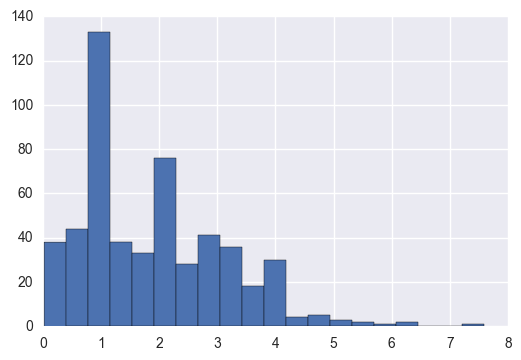

In [15]:
#Distribution of Years as a customer

clean_data['Years_as_Customer'].hist(bins=20)
plt.show()

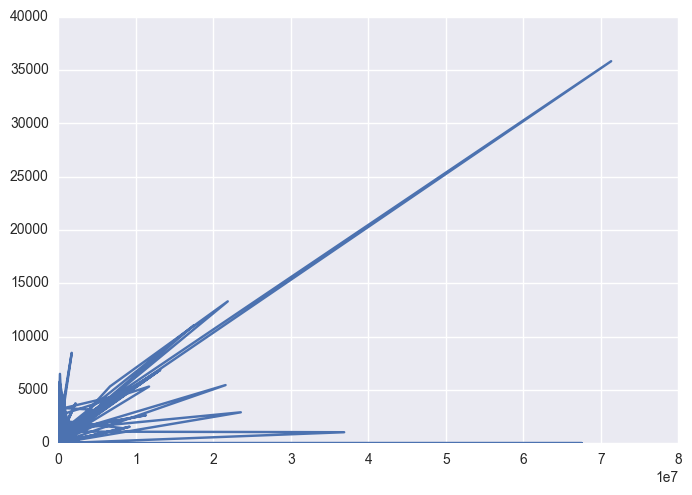

In [77]:
#Plot to show correlation between Firehose Usage and Page Views each month. I would expect there to be a positive correlation.

plt.figure()
plt.plot(clean_data.Avg_FH_Usage, clean_data.Avg_PG_Month)
plt.show()

In [78]:
log_columns = ['Avg_FH_Usage', 'Avg_PG_Month',]
log_clean_data = clean_data.copy()
log_clean_data[log_columns] = log_clean_data[log_columns].apply(np.log10)

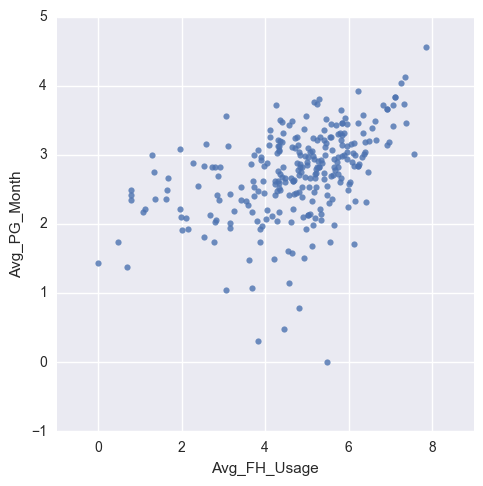

In [13]:
#Log plot between Firehose Usage and Page Views

sns.lmplot('Avg_FH_Usage', 'Avg_PG_Month', log_clean_data)
sns.plt.show()

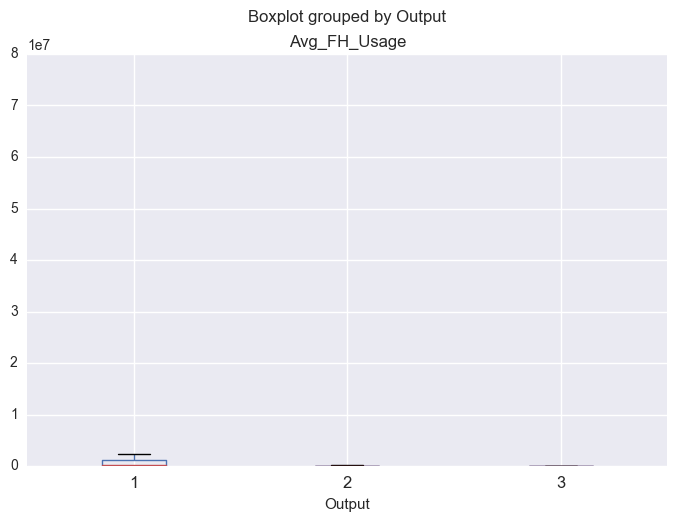

In [79]:
clean_data.boxplot(column='Avg_FH_Usage', by = 'Output')
plt.show()

In [91]:
X = clean_data[["Month_6_PG", "Month_5_PG", "Month_4_PG", "Avg_PG_Month", "Month_2_PG", "Month_3_PG", "Month_1_PG", "Total_Services_Days", "Paid_Days", "Monthly_FH_Quota", "Month_5_FH", "Services_Days_Delivered", "Month_6_FH", "Month_3_FH", "Avg_FH_Usage"]]

In [92]:
y = clean_data[["Output"]]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [94]:
len(X_train)

399

In [95]:
len(X_test)

134

In [96]:
len(y_train)

399

In [97]:
len(y_test)

134

In [99]:
train_output = pd.crosstab(index=y_train["Output"],  
                              columns="count")      

train_output

col_0,count
Output,
1,61
2,168
3,170


In [100]:
test_output = pd.crosstab(index=y_test["Output"],  
                              columns="count")      

test_output

col_0,count
Output,
1,23
2,59
3,52


In [101]:
data_dummies = pd.get_dummies(data=clean_data2, columns=['Output'])

In [55]:
data_dummies.corr()[['Output_1', 'Output_2', 'Output_3']].abs().apply(func=np.mean, axis=1).sort_values(ascending=False)

Output_2                   0.700077
Output_3                   0.697710
Output_1                   0.579325
Month_6_PG                 0.222933
Month_5_PG                 0.220306
Month_4_PG                 0.212426
Avg_PG_Month               0.210628
Month_2_PG                 0.194712
Month_3_PG                 0.193007
Month_1_PG                 0.188473
Total_Services_Days        0.185946
Paid_Days                  0.158027
Monthly_FH_Quota           0.134751
Month_5_FH                 0.111768
Services_Days_Delivered    0.110152
Month_6_FH                 0.109077
Month_3_FH                 0.106304
Avg_FH_Usage               0.104770
Month_1_FH                 0.092856
Month_4_FH                 0.085743
Business_Users             0.083679
Month_2_FH                 0.080135
Total_Users                0.079161
Analyst_Users              0.075342
Years_as_Customer          0.047198
Sales_Order_ACV            0.033672
Unique_Users               0.033597
Total_Logins               0

In [151]:
#KNN Test

knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [153]:
print knn.score(X_train, y_train)

0.71679197995


In [102]:
# Initialize logistic regression model
log_model = LogisticRegressionCV()

In [157]:
# Train the model
log_model.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [158]:
log_model.score(X_train, y_train)

0.64661654135338342

In [101]:
#This means 65% Accuracy

In [107]:
# Check trained model intercept
print(log_model.intercept_)

[ -5.48526885e-06  -1.65835268e-06   6.36259829e-06]


In [108]:
pd.DataFrame(zip('Output', np.transpose(log_model.intercept_)))

,0,1
0,O,-0.000005
1,u,-0.000002
2,t,0.000006


In [85]:
# Check trained model coefficients
print(log_model.coef_)

[[  2.06930006e-04   3.89171977e-05  -2.00005753e-04   1.75756021e-05
    4.42771330e-04  -2.45982319e-04  -1.34129968e-04   3.26987817e-05
    4.52680531e-05  -1.38136311e-07   6.14174050e-08   3.19750337e-05
    5.91454460e-08  -7.78904021e-08   1.94879759e-08]
 [  1.49312986e-04   2.59546286e-04   5.71601561e-05   3.19659796e-05
   -2.88669967e-04  -1.85995593e-04   1.98267002e-04  -1.65959360e-05
   -2.51079714e-05  -1.14345251e-07  -1.11087272e-07  -2.17490527e-05
   -4.81180472e-08  -2.66493774e-08   7.83400307e-08]
 [ -2.68760002e-03  -1.21592009e-03   2.39529992e-04  -5.84238829e-04
    3.17012693e-04   4.54842162e-04  -6.05216501e-04  -4.26474428e-05
   -4.20438043e-06   1.79983728e-07   9.24245032e-08   6.50690619e-05
    8.69281520e-08   2.40510714e-07  -2.68723510e-07]]


In [117]:
log_model.predict_proba(X_train)

array([[ 0.36366194,  0.44406081,  0.19227725],
       [ 0.30373242,  0.4179563 ,  0.27831127],
       [ 0.30961117,  0.33424078,  0.35614805],
       ..., 
       [ 0.34087868,  0.40966943,  0.24945189],
       [ 0.32162973,  0.33379272,  0.34457755],
       [ 0.85144919,  0.02599329,  0.12255753]])

In [110]:
#Running Model #2 - LR
log_model_2 = LogisticRegression()

In [111]:
log_model_2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [113]:
log_model_2.score(X_train, y_train)

0.64912280701754388

In [26]:
#65% Accuracy

In [131]:
#Running Model #3 - RandomForest

n_estimator_options = [100,200,500,1000]
max_depth_options = [2,4,8,16]

In [137]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=4)
random_forest.fit(X_train, y_train)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [138]:
random_forest.score(X_train, y_train)

0.77443609022556392

In [ ]:
#77% Accuracy. Random Forests seem to be best of the 3 models. 

In [66]:
fi = random_forest.feature_importances_
print fi

[ 0.12348314  0.14167533  0.09918014  0.20796056  0.03107909  0.09684051
  0.08303574  0.06848976  0.01977955  0.01224184  0.03402587  0.00990184
  0.02747237  0.0197375   0.02509676]


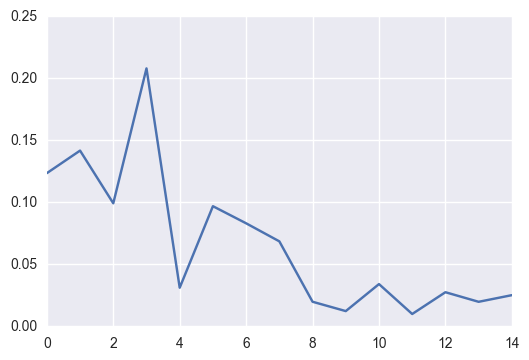

In [71]:
#Which variable does each value correspond to?
plt.plot(random_forest.feature_importances_)

In [76]:
accuracy_score?

In [140]:
gridsearch_model = Ridge()
gridsearch = gridsearch(estimator=gridsearch_model,)

NameError: name 'SVC' is not defined

In [121]:
confusion_matrix?